# Decision Tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

for more information
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [4]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
1.0


### Messing with train data

In [5]:
import numpy as np

X_train = np.append(X_train, [X_train[0]], axis=0)
y_train = np.append(y_train, [0], axis=0)

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
0.9911504424778761


In [7]:
import random

for _ in range(3):
    X_train = np.append(X_train, [X_train[0]], axis=0)
    y_train = np.append(y_train, random.sample([0,1,2], 1), axis=0)

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
0.9741379310344828


# Visualizing DT

In [9]:
feature_cols = ['feature'+str(i) for i in range(len(X[0]))]

In [10]:
feature_cols

['feature0', 'feature1', 'feature2', 'feature3']

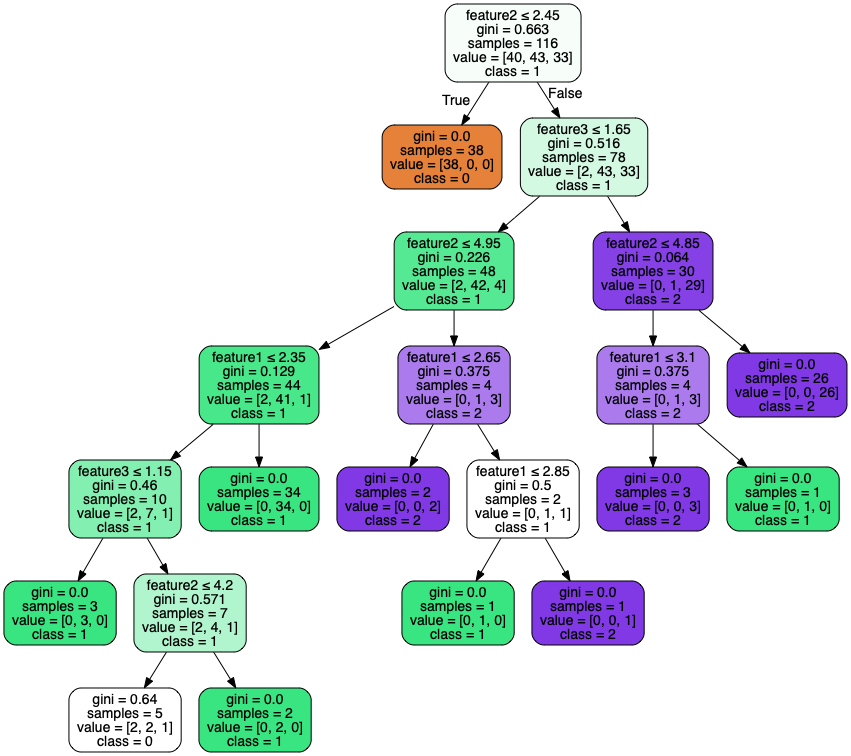

In [11]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO 
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())